# Figure 8: Surface plots (diffusion parameters)

In [3]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import os
import matplotlib.pyplot as plt

Define the function that computes percentage of Type 1 Turing instability for the diffusion parameter combinations 

In [7]:
def calc_Turing(n, vr):
    # random matrix generating function
    def gen_matrix_F(n, vr):
        # Generate random matrix without diffusion
        I = np.eye(n)   # Identity matrix representing degradation
        mu = 0  # Mean
        B = mu + np.sqrt(vr) * np.random.randn(n, n)    # Random matrix generator, allowing diagonal term to be non-zero
        np.fill_diagonal(B, 0)
        A = -I + B  # Modified matrix form
        D = np.zeros((n, n))     # Initialize diffusion matrix
        return A, D
    
    dx = [-3,-2.8,-2.6,-2.4,-2.2,-2,-1.8,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3]     # diffusion parameter of species X    
    dy = [-3,-2.8,-2.6,-2.4,-2.2,-2,-1.8,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3]     # diffusion parameter of species Y    
    dp_list = [(x, y) for x in dx for y in dy]      # list of diffusion parameter combinations
    
    df = []     # storing % turing instability for each combination
  

    for d in dp_list:

        D = gen_matrix_F(n, vr)[1]      # diagonal matrix
        D[0, 0] = 10**d[0]
        D[1, 1] = 10**d[1]    
        k = np.arange(0, 101, 0.2)      # wavelengths 

        rm = []     # random matrices
        for i in range(1000):
            m = gen_matrix_F(n,vr)[0]      
            rm.append(m)
        srm = []    # stable random matrices 
        for m in rm:
            ev = np.linalg.eigvals(m)
            if np.max(np.real(ev)) < 0:
                srm.append(m)

        # type 1a instability: matrices, real and imaginary eigenvalues
        t1a = []
        t1ar = []
        t1ai = []
        # type 1b instability: matrices, real and imaginary eigenvalues
        t1b = []
        t1br = []
        t1bi = []
        # type 2a instability: matrices, real and imaginary eigenvalues
        t2a = []
        t2ar = []
        t2ai = []
        # type 2b instability: matrices, real and imaginary eigenvalues
        t2b = []
        t2br = []
        t2bi = []

        
        for m in srm:       # instability analysis for stable random matrices
            Em = []
            Emi = []
            for i in range(len(k)):
                R = m - D * (k[i] ** 2)
                eigval = np.linalg.eigvals(R)
                Em.append(np.max(np.real(eigval)))
                idx_max = np.argmax(np.real(eigval))
                Emi.append(np.imag(eigval[idx_max]))
            a = np.max(Em)
            index = np.argmax(Em)
            nEm = np.array(Em)
            if a > 0:
                if Emi[index] == 0:
                    numZeroCrossing = np.count_nonzero(np.diff(np.sign(Em)))                    # Count zero crossings
                    numpositivelocalmaxima = np.sum(nEm[argrelextrema(nEm,np.greater)]>0) > 0   # Count positive local maxima 
                    if numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 0:     # condition for type 1a instability
                        t1a.append(m)
                        t1ar.append(Em)
                        t1ai.append(Emi)
                    elif numpositivelocalmaxima > 0 and numZeroCrossing == 1:       # condition for type 1b instability
                        t1b.append(m)
                        t1br.append(Em)
                        t1bi.append(Emi)
                    elif numpositivelocalmaxima == 0 and numZeroCrossing % 2 == 1:  # condition for type 2a instability
                        t2a.append(m)
                        t2ar.append(Em)
                        t2ai.append(Emi)
                    elif numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 1:   # condition for type 2b instability
                        t2b.append(m)
                        t2br.append(Em)
                        t2bi.append(Emi)
        percent = (len(t1a)+len(t1b))*0.1
        df.append(percent)
   
    return df

Generate data

In [8]:
dxdy = calc_Turing(3,1)

Generate surface plot

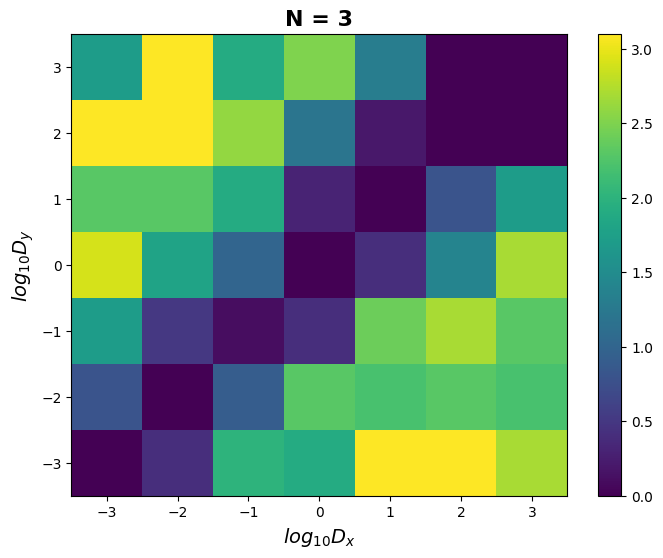

In [12]:
x = np.array([-3,-2.8,-2.6,-2.4,-2.2,-2,-1.8,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3] )
y = np.array([-3,-2.8,-2.6,-2.4,-2.2,-2,-1.8,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3] )
X, Y = np.meshgrid(x, y)
Z = np.array([z for z in dxdy
             ])
Z0 = [Z[i:i + 31] for i in range(0, len(Z), 31)]

# Create a colormap plot
plt.figure(figsize=(8, 6))
colormap = plt.pcolormesh(X, Y, Z0, cmap='viridis')
plt.colorbar(colormap)
plt.xlabel(r'$log_{10}$$D_{x}$', fontsize = 14)
plt.ylabel(r'$log_{10}$$D_{y}$', fontsize = 14)
plt.title('N = 3', fontsize = 16,  fontweight = 'bold')
plt.show()